# Data Analysis: healthcare-dataset-stroke-data


## Contents:
1. Data Loading and Overview
2. Basic Statistics
3. Data Information
4. Missing Values Analysis
5. Categorical Variables Analysis
6. Data Visualization
7. Correlation Analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

from RnP.Research.Ml.MLToolsImplementing import predict

# Display settings
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

print('📊 Libraries loaded successfully!')

📊 Libraries loaded successfully!


## 1. Загрузка и первичный просмотр данных


In [3]:
# Загрузка данных из CSV файла
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

print(f'Данные загружены: {len(df)} строк, {len(df.columns)} столбцов')

Данные загружены: 5110 строк, 12 столбцов


In [4]:
# Просмотр первых строк данных
print('Первые 5 строк:')
df.head()

Первые 5 строк:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Показать весь датафрейм (осторожно с большими данными!)
print('Полный датафрейм:')
df

Полный датафрейм:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2. Основная статистика


In [6]:
# Описательная статистика для числовых переменных
print('📈 Описательная статистика:')
df.describe()

📈 Описательная статистика:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [25]:
# Описательная статистика для всех переменных
print('📊 Статистика для всех типов данных:')
df.describe(include='all')

📊 Статистика для всех типов данных:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## 3. Информация о структуре данных


In [8]:
# Общая информация о датафрейме
print('ℹ️ Информация о данных:')
df.info()

ℹ️ Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Типы данных в каждом столбце
print('🔢 Типы данных:')
print(df.dtypes)
print('\n📏 Размер данных:', df.shape)

🔢 Типы данных:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

📏 Размер данных: (5110, 12)


## 4. Анализ пропущенных значений


In [10]:
# Количество пропущенных значений в каждой колонке
print('❌ Пропущенные значения:')
missing_data = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

missing_table = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент': missing_percent
})
missing_table = missing_table[missing_table['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

if len(missing_table) > 0:
    print(missing_table)
else:
    print('✅ Пропущенных значений не найдено!')

❌ Пропущенные значения:
     Пропущено   Процент
bmi        201  3.933464


In [33]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

## 5. Анализ категориальных переменных


In [34]:
# Анализ уникальных значений для каждой колонки
print('🔍 Уникальные значения в каждой колонке:')
for col in df.columns:
    unique_count = df[col].nunique()
    print(f'{col}: {unique_count} уникальных значений')
    
    # Показываем value_counts для категориальных переменных (менее 20 уникальных значений)
    if unique_count < 20 and unique_count > 1:
        print(f'  Распределение значений:')
        print(df[col].value_counts().head(10))
        print()

🔍 Уникальные значения в каждой колонке:
gender: 3 уникальных значений
  Распределение значений:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

age: 104 уникальных значений
hypertension: 2 уникальных значений
  Распределение значений:
hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease: 2 уникальных значений
  Распределение значений:
heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married: 2 уникальных значений
  Распределение значений:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type: 5 уникальных значений
  Распределение значений:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type: 2 уникальных значений
  Распределение значений:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

avg_glucose_level: 3979 уникальных значений
bmi: 419 уникальных значений
smoking_sta

In [30]:
values = ['never smoked','formerly smoked','smokes']
unknown_idx = df[df['smoking_status'] == 'Unknown'].index
df.loc[unknown_idx, 'smoking_status'] = np.random.choice(values,size=len(unknown_idx),replace=True)

## 6. Визуализация данных


In [19]:
df.drop(['id'],axis=1,inplace=True)

In [35]:
# Определяем числовые и категориальные колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'📊 Числовые колонки ({len(numeric_cols)}): {numeric_cols}')
print(f'📝 Категориальные колонки ({len(categorical_cols)}): {categorical_cols}')

📊 Числовые колонки (6): ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
📝 Категориальные колонки (5): ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


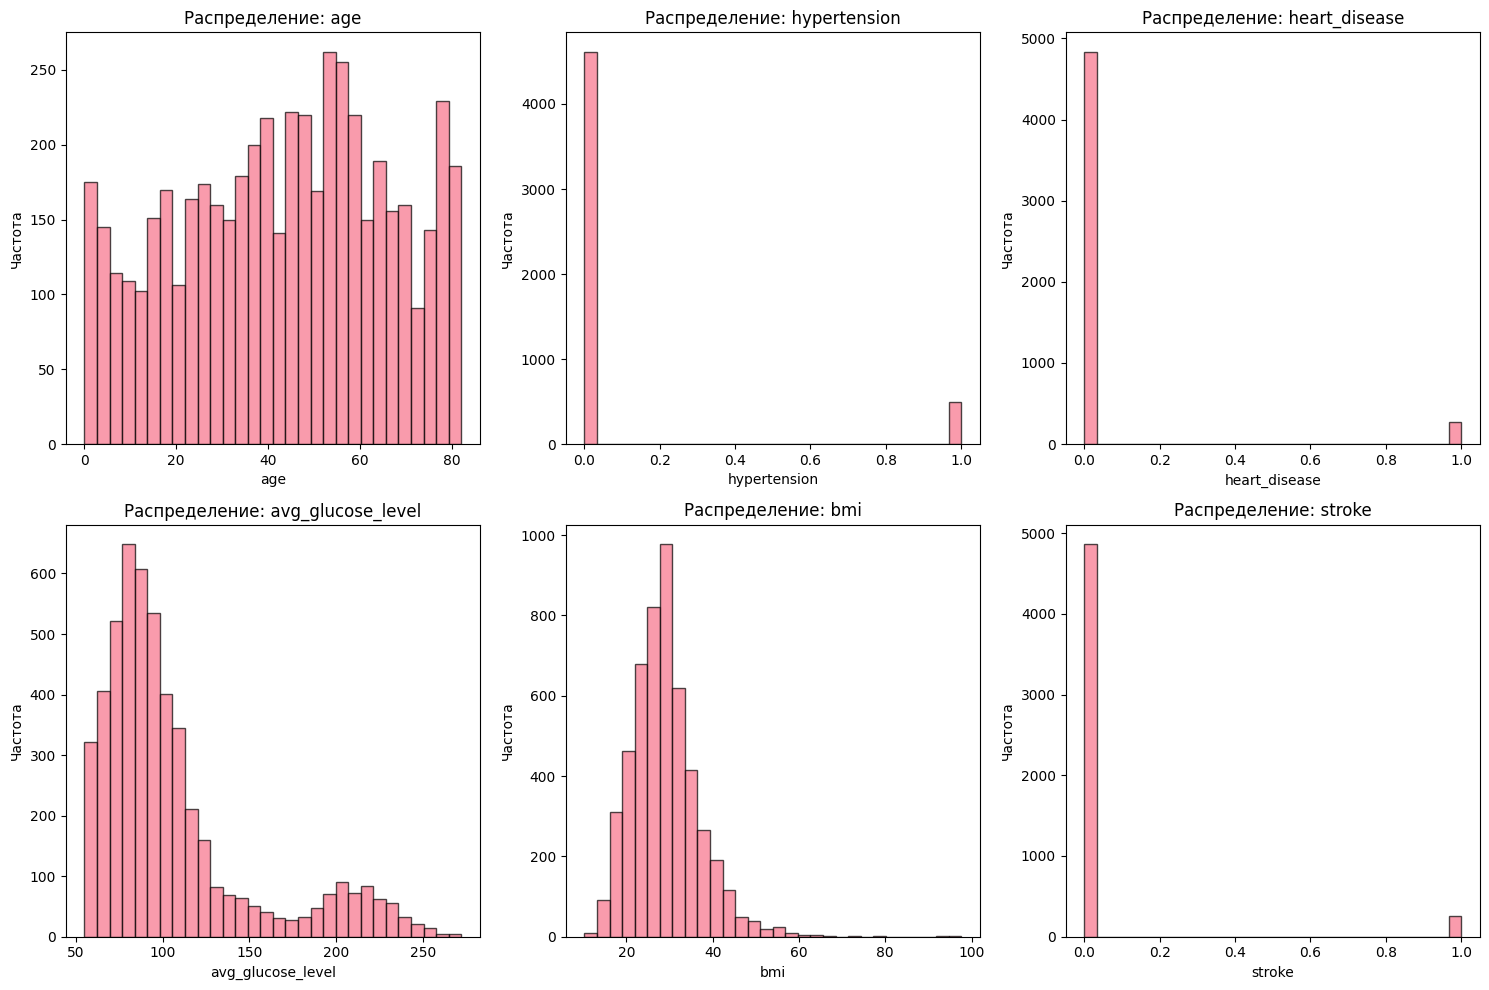

In [36]:
# Гистограммы для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'Распределение: {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Частота')
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения гистограмм не найдено.')

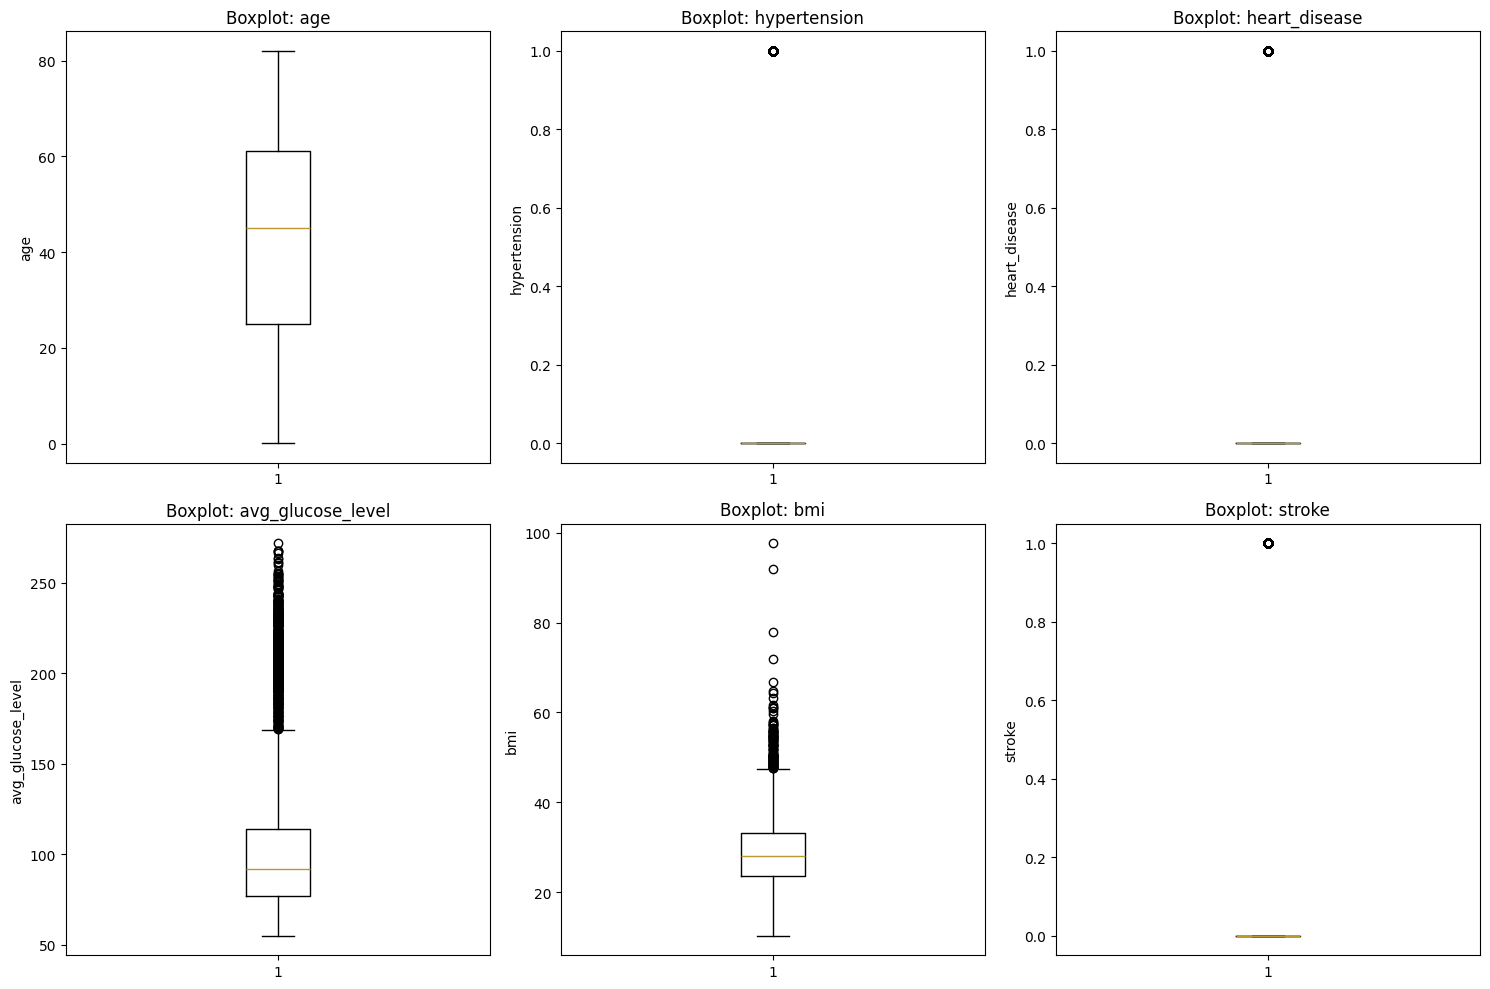

In [22]:
# Boxplot для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].boxplot(df[col].dropna())
        axes[row, col_idx].set_title(f'Boxplot: {col}')
        axes[row, col_idx].set_ylabel(col)
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения boxplot не найдено.')

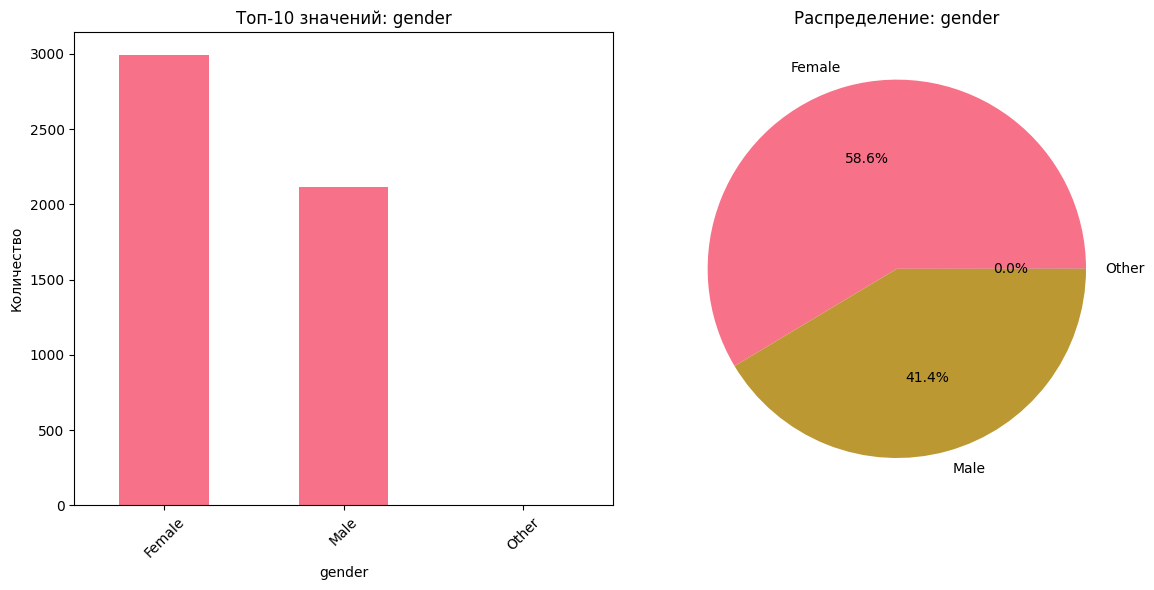

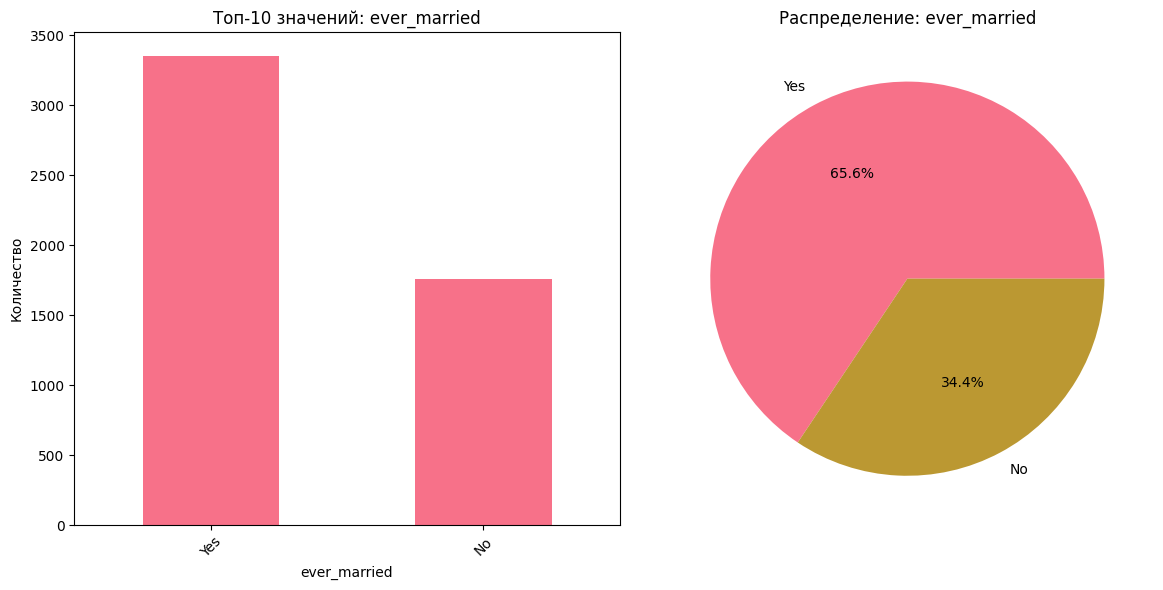

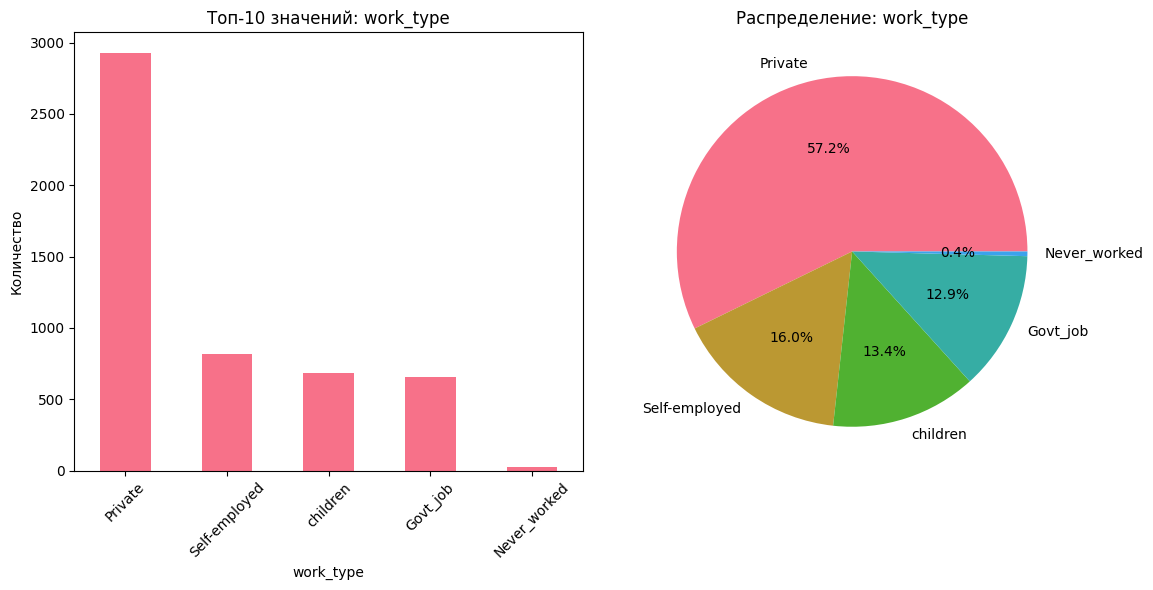

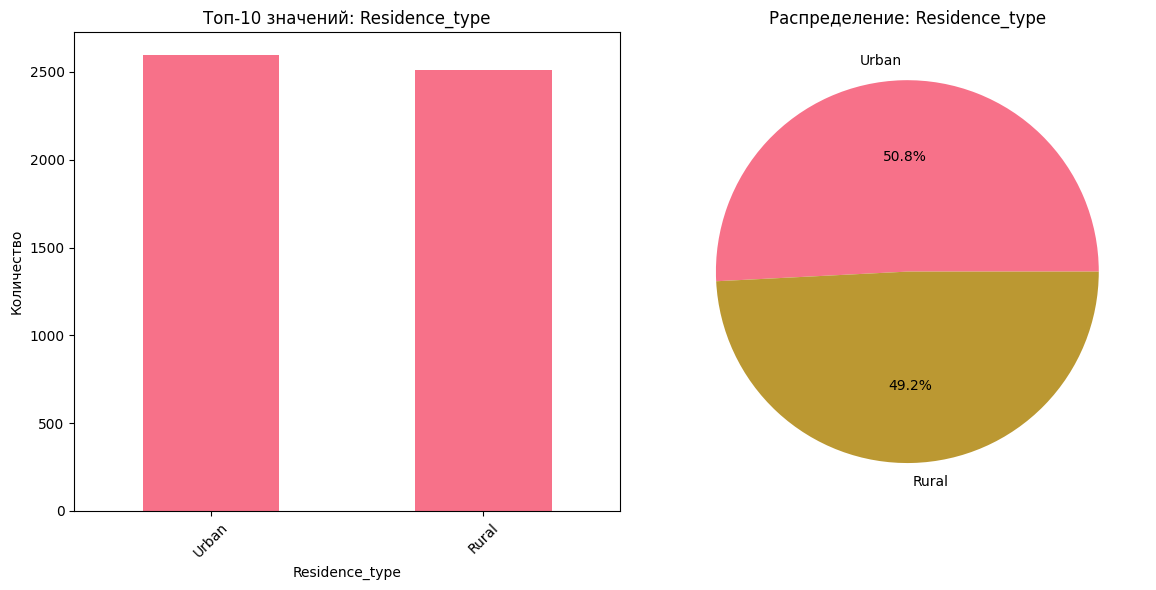

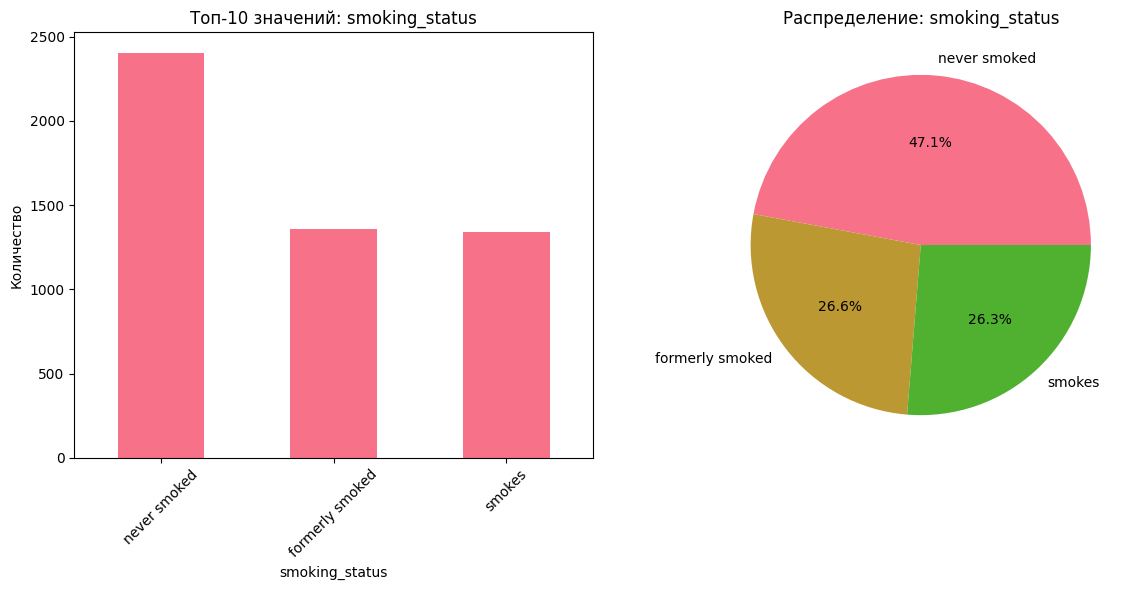

In [37]:
# Столбчатые диаграммы для категориальных переменных
if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Ограничиваем первыми 5 категориальными переменными
        plt.figure(figsize=(12, 6))
        
        # Берем топ-10 значений для отображения
        top_values = df[col].value_counts().head(10)
        
        plt.subplot(1, 2, 1)
        top_values.plot(kind='bar')
        plt.title(f'Топ-10 значений: {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Количество')
        
        plt.subplot(1, 2, 2)
        top_values.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Распределение: {col}')
        plt.ylabel('')
        
        plt.tight_layout()
        plt.show()
else:
    print('Категориальных переменных не найдено.')

## 7. Корреляционный анализ


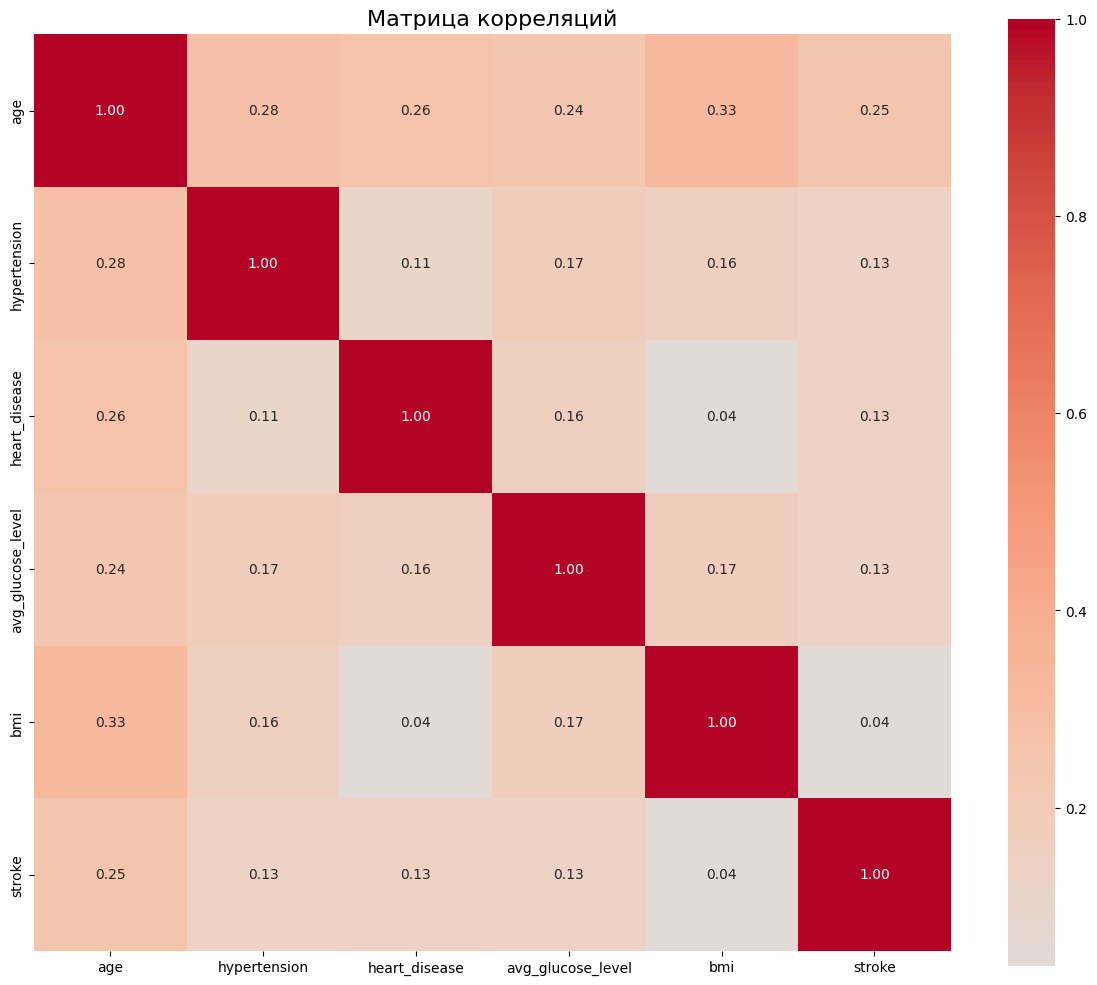

🔗 Сильные корреляции (|r| > 0.7):
Сильных корреляций не найдено.


In [38]:
# Матрица корреляций для числовых переменных
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Матрица корреляций', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Показываем сильные корреляции
    print('🔗 Сильные корреляции (|r| > 0.7):')
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append({
                    'Переменная 1': correlation_matrix.columns[i],
                    'Переменная 2': correlation_matrix.columns[j],
                    'Корреляция': round(corr_val, 3)
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        print(strong_corr_df.to_string(index=False))
    else:
        print('Сильных корреляций не найдено.')
        
elif len(numeric_cols) == 1:
    print(f'Найдена только одна числовая переменная: {numeric_cols[0]}')
else:
    print('Числовых переменных для корреляционного анализа не найдено.')

## 8. Заключение

### Основные выводы:
- Размер данных: укажите количество строк и столбцов
- Качество данных: опишите наличие пропущенных значений
- Ключевые паттерны: опишите найденные закономерности
- Рекомендации: предложите дальнейшие шаги анализа

### Дальнейшие шаги:
1. Очистка данных (если необходимо)
2. Feature engineering
3. Машинное обучение (если применимо)
4. Создание дашборда или отчета


In [40]:
df.columns 

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [161]:
X = pd.get_dummies(df, ['bmi','avg_glucose_level','age','gender','ever_married','work_type','Residence_type','smoking_status'])
X.drop(['stroke'],axis=1,inplace=True)

In [177]:
X.shape

(5110, 41)

In [162]:
y = df['stroke']

In [180]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [163]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)

In [178]:
X_res.shape

(498, 41)

In [179]:
y_res.value_counts()

stroke
0    249
1    249
Name: count, dtype: int64

In [42]:
bins = [0,10,20,30,40,50,60,70,83]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels,right=True)

In [48]:
bins = [55,85,115,145,175,205,235,275]
labels = ['55-85','85-115','115-145','145-175','175-205','205-235','235-275']
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels,right=True)

In [51]:
bins = [10,20,30,40,50,60,70,80,90,100]
labels = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90+']
df['bmi'] = pd.cut(df['bmi'], bins=bins, labels=labels,right=True)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        49
           1       0.65      0.59      0.62        51

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



In [166]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61        49
           1       0.65      0.98      0.78        51

    accuracy                           0.72       100
   macro avg       0.80      0.71      0.70       100
weighted avg       0.80      0.72      0.70       100



In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        49
           1       0.78      0.92      0.85        51

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [168]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced',kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        49
           1       0.72      0.92      0.81        51

    accuracy                           0.78       100
   macro avg       0.80      0.78      0.77       100
weighted avg       0.80      0.78      0.77       100



In [169]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced', kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.76      0.82      0.79        51

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [170]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced', kernel='sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        49
           1       0.77      0.84      0.80        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



0.7407407407407407


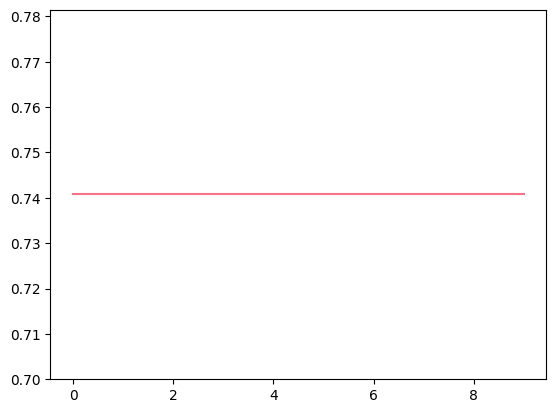

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
res = []
for i in range(0,10):
    model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    res.append(precision_score(y_test,y_pred))
plt.plot(range(0,10),res)
print(precision_score(y_test,y_pred))


In [175]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        51

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [173]:
from sklearn.ensemble import StackingClassifier
base_model = LogisticRegression()
meta_models = [
    ('rf', RandomForestClassifier(n_estimators=100,class_weight='balanced')),
    ('svc', SVC(kernel='linear')),
    ('naive_bayes', GaussianNB()),
]
stack_model = StackingClassifier(estimators=meta_models,final_estimator=base_model,cv=5)

In [174]:
stack_model.fit(X_train,y_train)
y_pred = stack_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75        49
           1       0.73      0.92      0.82        51

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



At start we had about 5000 classes that belongs to 2 class; But they were imbalanced.First class had about 4800 classes, while second one had about 200. So almost all models ignored the class 2 by giving 95% accuracy to the first class and over 10 % to the second class. Then I used the randomUnderSampler.After this we got about 500 classes.We just cut large piece of class 1 to get result better.Models were trained by using 80% of 498 classes.